<h3>Lab 4/5: Mini-Assignment<br></h3>

# ANZ Lab Assignment

## Task

Investigate the similarities and differences between Australia and New Zealand on a demographic feature of your choice, as discussed in the accompanying assignment sheet `ANZAssign.pdf`.

---

### Context

The question I would like to answer is what are the similarities and differences between religious affiliation in Australia and New Zealand. This question has relevance because both countries have historical similarities, and both are routinely noted to have dropping levels religious affiliation, so this report will seek to investigate whether the countries have different levels or religious affiliation across different categories in terms of their total populations.

### Data Acquisition

#### Australia
Religious affiliation data for Australia from the 2016 Census was obtained from the Australian Bureau of Statistic website. A direct link cannot be provided, but a zip file is available from https://datapacks.censusdata.abs.gov.au/datapacks/ by selecting the following options: *2016 Census Datapack / General Community Profile / Australia*. From the downloaded zip file, the metadata gives directions to table G14 for Religious Affiliation by Sex, which can be found in the zip file location: *2016 Census GCP Australia for AUST / 2016Census_G14_AUS.csv*. Additional cell descriptor information was obtained from the same zip file in *Metadata/Metadata_2016_GCP_DataPack.xlsx* and the tab *Cell Descriptors Information* was exported as a CSV file to assist in data cleaning. This file was reduced in size by removing irrelevant data before importing due to the 1MB file restriction.

#### New Zealand
Religious affiliation data for New Zealand from the 2018 Census was obtained from the Stats NZ website at http://nzdotstat.stats.govt.nz/wbos/index.aspx. From the navigation panel, the options selected from the left panel were *2018 Census >> Ethnicity, culture and identity >> Religious affiliation (total responses) by age group and sex, 2006, 2013, 2018 Censuses*. As the Stats NZ website allows for customised tables the be generated, the following options were selected: *Year = 2018; Area = Total - New Zealand by RegionalCouncil/SA2^; Religious Affiliation = All Selected (Excluding Maori Subsets^^); Age Group = Total; Sex = Total.*  The table was then exported as a CSV file, which is required to be emailed to the recipient.  
*(Note: ^ all available options for Area hold identical data, so the first option was arbitrarily selected; ^^ Maori subsets were discluded due to lack of comparability with Australian data).*

In [1]:
NZ_data = "TABLECODE8289_Data_a3090f88-82e2-4a67-a629-bac9f70eef99.csv"
AU_data = "2016Census_G14_AUS.csv"
AU_descriptors = "Metadata_2016_GCP_DataPack-Cell_Descriptors_Information-REDUCED.csv"

### Data Cleaning/Conversion

Initial conversion of the data involved removing the commas and newline characters from the csv files, and the resulting values placed in lists of lists. This process was different for the two countries due to the vertical and horizontal orientation of their respective tables. In addition, the Australian data fields featured abbreviated category names, which required the inclusion of an additional file to that was used to translate the codes into a more readable format. Many category names had to be individually revised so the data between countries matched, and some subtotal categories were removed due to irrelevance to this report. In addition it should be noted that although they are not the same religion, Aboriginal and Maori religions were both renamed as Indigenous religions so the proportions could be compared between countries.

In [2]:
### CODE FROM PREVIOUS CELLS REPOSTED BELOW ###

NZ_data = "TABLECODE8289_Data_a3090f88-82e2-4a67-a629-bac9f70eef99.csv"
AU_data = "2016Census_G14_AUS.csv"
AU_desc_data = "Metadata_2016_GCP_DataPack-Cell_Descriptors_Information-REDUCED.csv"

### CODE FROM PREVIOUS CELLS REPOSTED ABOVE ###

def read_data(data):
    """Reads a csv file and returns a list of lists"""
    with open(data, "r") as a_file:
        line_list = []
        for line in a_file:
            strip_line = line.strip().partition("\n")
            txt = strip_line[0].split(",")
            line_list.append(txt)
        return line_list

NZ_list = read_data(NZ_data)
AU_list = read_data(AU_data)
AU_desc_list = read_data(AU_desc_data)

## NZ cleaning
NZ_clean_list = []
del NZ_list[0:2]
del NZ_list[-1]
for line in NZ_list:
    if len(line) > 7:
        line[1] = line[1] + "," + line[2]
        del line[2]
    NZ_clean_list.append([line[1][1:-1], int(line[5])])

# extract NZ Christian list
NZ_Chr_clean_list = NZ_clean_list[2:14]
del NZ_clean_list[2:14]

# additional NZ & NZ_Chr fine grain cleaning
NZ_clean_list[0][0] = NZ_clean_list[0][0].replace("Christian", "Christianity")
NZ_clean_list[1][0] = NZ_clean_list[1][0].replace("Maori Religions, Beliefs and Philosophies", "Indigenous religions")
NZ_clean_list[6][0] = NZ_clean_list[6][0].replace("Spiritualism and New Age religions", "Other Spiritual Beliefs")
NZ_clean_list[12][0] = NZ_clean_list[12][0].replace("Object to answering", "Not stated")
NZ_clean_list[13][0] = NZ_clean_list[13][0].replace("Total people stated", "Total")
del NZ_clean_list[10] # subtotal removed
NZ_Chr_clean_list[0][0] = NZ_Chr_clean_list[0][0].replace("nfd", "Not Further Defined")
NZ_Chr_clean_list[6][0] = NZ_Chr_clean_list[6][0].replace("Jehovah's Witnesses", "Jehovahs Witnesses")
NZ_Chr_clean_list[10][0] = NZ_Chr_clean_list[10][0].replace("Presbyterian, Congregational and Reformed", "Presbyterian and Reformed")
NZ_Chr_clean_list[11][0] = NZ_Chr_clean_list[11][0].replace("Other Christian religions", "Other Christian")
NZ_Chr_clean_list.append([NZ_clean_list[0][0].replace("Christianity", "Total"), NZ_clean_list[0][1]])

## AU cleaning
# clean AU Religion list and add full descriptions
AU_clean_list = []
for i in range (0, len(AU_list[0])):
    if AU_list[0][i][-1] == 'P':
        AU_clean_list.append([AU_list[0][i], int(AU_list[1][i])])
AU_desc_list_clean = []
for line in AU_desc_list:
    if line[3] == 'G14' and line[1][-1] == "P":
        AU_desc_list_clean.append([line[1], line[2][0:-8].replace("_", " ")])
for line in AU_clean_list:
    for i in range(0, len(AU_desc_list_clean)):
        if line[0] == AU_desc_list_clean[i][0]:
            line[0] = AU_desc_list_clean[i][1]
            continue

# extract AU Christian list
AU_Chr_clean_list = AU_clean_list[1:21]
del AU_clean_list[1:20]

# additional AU & AU_Chr fine grain cleaning
AU_clean_list[1][0] = AU_clean_list[1][0].replace("Christianity Total", "Christianity")
del AU_clean_list[8] # subtotal removed
del AU_clean_list[-3] # subtotal removed
for line in AU_clean_list:
    line[0] = line[0].replace("Other Religions ", "")
    line[0] = line[0].replace("Secular Beliefs and Other Spiritual Beliefs and No Religious Affiliation ", "")
AU_clean_list[7][0] = AU_clean_list[7][0].replace("Other religious groups", "Other religions")
AU_clean_list[8][0] = AU_clean_list[8][0].replace("No Religion So Described", "No religion")
AU_clean_list[5][0] = AU_clean_list[5][0].replace("Australian Aboriginal Traditional Religions", "Indigenous religions")
AU_clean_list[11][0] = AU_clean_list[11][0].replace("Religious affiliation Not Stated", "Not stated")
for line in AU_Chr_clean_list:
    line[0] = line[0].replace("Christianity ", "")
AU_Chr_clean_list[-3][0] = AU_Chr_clean_list[-3][0].replace("nfd", "Christian Not Further Defined")
AU_Chr_clean_list[4][0] = AU_Chr_clean_list[4][0].replace("Catholic", "Catholicism")
AU_Chr_clean_list[-1][0] = "Total"
AU_Chr_clean_list[8][0] = AU_Chr_clean_list[8][0].replace("Latter day Saints", "Latter-day Saints")
AU_clean_list[1][0] = "Christianity"

In [3]:
# Interim data processing results
print()
print("NZ Religion")
for line in NZ_clean_list:
    print(line)
print()
print("AU Religion")
for line in AU_clean_list:
    print(line)
print()
print("NZ Christian")
for line in NZ_Chr_clean_list:
    print(line)
print()
print("AU Christian")
for line in AU_Chr_clean_list:
    print(line)


NZ Religion
['Christianity', 1717179]
['Indigenous religions', 61698]
['Buddhism', 52761]
['Hinduism', 123384]
['Islam', 60621]
['Judaism', 5265]
['Other Spiritual Beliefs', 19434]
['Sikhism', 40908]
['Jedi', 20409]
['Other religions', 29790]
['No religion', 2264601]
['Not stated', 312795]
['Total', 4699755]

AU Religion
['Buddhism', 563674]
['Christianity', 12201600]
['Hinduism', 440300]
['Islam', 604240]
['Judaism', 91022]
['Indigenous religions', 8078]
['Sikhism', 125901]
['Other religions', 87610]
['No religion', 6933708]
['Secular Beliefs', 67592]
['Other Spiritual Beliefs', 39416]
['Not stated', 2238735]
['Total', 23401892]

NZ Christian
['Christian Not Further Defined', 307926]
['Adventist', 18480]
['Anglican', 314913]
['Baptist', 39030]
['Catholicism', 470919]
['Evangelical, Born Again and Fundamentalist', 38856]
['Jehovahs Witnesses', 20061]
['Latter-day Saints', 54123]
['Methodist', 72597]
['Pentecostal', 81300]
['Presbyterian and Reformed', 242706]
['Other Christian', 76707

### Data analysis/Interpretation

Sorting the lists for comparison required combining some categories into others so that both countries could be compared on matching categories. This mostly resulted in smaller categories being shifted into a miscellaneous "other" category. In analyzing the data, an additional column was added to each table representing the calculated percentages for each category based on the total, so that comparison between the two countries will be more valid given their differing population sizes.

In [4]:
### CODE FROM PREVIOUS CELLS REPOSTED  BELOW ###

NZ_data = "TABLECODE8289_Data_a3090f88-82e2-4a67-a629-bac9f70eef99.csv"
AU_data = "2016Census_G14_AUS.csv"
AU_desc_data = "Metadata_2016_GCP_DataPack-Cell_Descriptors_Information-REDUCED.csv"

def read_data(data):
    """Reads a csv file and returns a list of lists"""
    with open(data, "r") as a_file:
        line_list = []
        for line in a_file:
            strip_line = line.strip().partition("\n")
            txt = strip_line[0].split(",")
            line_list.append(txt)
        return line_list

NZ_list = read_data(NZ_data)
AU_list = read_data(AU_data)
AU_desc_list = read_data(AU_desc_data)

## NZ cleaning
NZ_clean_list = []
del NZ_list[0:2]
del NZ_list[-1]
for line in NZ_list:
    if len(line) > 7:
        line[1] = line[1] + "," + line[2]
        del line[2]
    NZ_clean_list.append([line[1][1:-1], int(line[5])])

# extract NZ Christian list
NZ_Chr_clean_list = NZ_clean_list[2:14]
del NZ_clean_list[2:14]

# additional NZ & NZ_Chr fine grain cleaning
NZ_clean_list[0][0] = NZ_clean_list[0][0].replace("Christian", "Christianity")
NZ_clean_list[1][0] = NZ_clean_list[1][0].replace("Maori Religions, Beliefs and Philosophies", "Indigenous religions")
NZ_clean_list[6][0] = NZ_clean_list[6][0].replace("Spiritualism and New Age religions", "Other Spiritual Beliefs")
NZ_clean_list[12][0] = NZ_clean_list[12][0].replace("Object to answering", "Not stated")
NZ_clean_list[13][0] = NZ_clean_list[13][0].replace("Total people stated", "Total")
del NZ_clean_list[10] # subtotal removed
NZ_Chr_clean_list[0][0] = NZ_Chr_clean_list[0][0].replace("nfd", "Not Further Defined")
NZ_Chr_clean_list[6][0] = NZ_Chr_clean_list[6][0].replace("Jehovah's Witnesses", "Jehovahs Witnesses")
NZ_Chr_clean_list[10][0] = NZ_Chr_clean_list[10][0].replace("Presbyterian, Congregational and Reformed", "Presbyterian and Reformed")
NZ_Chr_clean_list[11][0] = NZ_Chr_clean_list[11][0].replace("Other Christian religions", "Other Christian")
NZ_Chr_clean_list.append([NZ_clean_list[0][0].replace("Christianity", "Total"), NZ_clean_list[0][1]])

## AU cleaning
# clean AU Religion list and add full descriptions
AU_clean_list = []
for i in range (0, len(AU_list[0])):
    if AU_list[0][i][-1] == 'P':
        AU_clean_list.append([AU_list[0][i], int(AU_list[1][i])])
AU_desc_list_clean = []
for line in AU_desc_list:
    if line[3] == 'G14' and line[1][-1] == "P":
        AU_desc_list_clean.append([line[1], line[2][0:-8].replace("_", " ")])
for line in AU_clean_list:
    for i in range(0, len(AU_desc_list_clean)):
        if line[0] == AU_desc_list_clean[i][0]:
            line[0] = AU_desc_list_clean[i][1]
            continue

# extract AU Christian list
AU_Chr_clean_list = AU_clean_list[1:21]
del AU_clean_list[1:20]

# additional AU & AU_Chr fine grain cleaning
AU_clean_list[1][0] = AU_clean_list[1][0].replace(" Total", "")
del AU_clean_list[8] # subtotal removed
del AU_clean_list[-3] # subtotal removed
for line in AU_clean_list:
    line[0] = line[0].replace("Other Religions ", "")
    line[0] = line[0].replace("Secular Beliefs and Other Spiritual Beliefs and No Religious Affiliation ", "")
AU_clean_list[7][0] = AU_clean_list[7][0].replace("Other religious groups", "Other religions")
AU_clean_list[8][0] = AU_clean_list[8][0].replace("No Religion So Described", "No religion")
AU_clean_list[5][0] = AU_clean_list[5][0].replace("Australian Aboriginal Traditional Religions", "Indigenous religions")
AU_clean_list[11][0] = AU_clean_list[11][0].replace("Religious affiliation Not Stated", "Not stated")
for line in AU_Chr_clean_list:
    line[0] = line[0].replace("Christianity ", "")
AU_Chr_clean_list[-3][0] = AU_Chr_clean_list[-3][0].replace("nfd", "Christian Not Further Defined")
AU_Chr_clean_list[4][0] = AU_Chr_clean_list[4][0].replace("Catholic", "Catholicism")
AU_Chr_clean_list[-1][0] = "Total"
AU_Chr_clean_list[8][0] = AU_Chr_clean_list[8][0].replace("Latter day Saints", "Latter-day Saints")
AU_clean_list[1][0] = "Christianity"

### CODE FROM PREVIOUS CELLS REPOSTED ABOVE ###

def move_category(focus_list, from_cat, to_cat):
    """Moves population from one category to another and removes the original entry"""
    from_index = -1
    to_index = -1
    for i in range(0, len(focus_list)):
        if focus_list[i][0] == from_cat:
            from_index = i
        if focus_list[i][0] == to_cat:
            to_index = i
    focus_list[to_index][1] += int(focus_list[from_index][1])
    del focus_list[from_index]
    return focus_list

## Religion category sorting
NZ_sorted = sorted(NZ_clean_list[0:-1])
AU_sorted = sorted(AU_clean_list[0:-1])

# Combine incomparable categories
NZ_sorted = move_category(NZ_sorted, "Jedi", "Other religions")
AU_sorted = move_category(AU_sorted, "Secular Beliefs", "No religion")

# Add column totals and row percentages
NZ_sorted.append(NZ_clean_list[-1])
AU_sorted.append(AU_clean_list[-1])
for line in NZ_sorted:
    line.append(round(line[1] / NZ_sorted[-1][1] * 100, 2))
for line in AU_sorted:
    line.append(round(line[1] / AU_sorted[-1][1] * 100, 2))

# Check validity of tables formatting
for i in range(0, len(AU_sorted)):
    if AU_sorted[i][0] != NZ_sorted[i][0]:
        raise Exception("Error at index " + str(i), AU_sorted[i][0], NZ_sorted[i][0], AU_sorted, NZ_sorted)

## Christian category sorting
NZ_Chr_sorted = sorted(NZ_Chr_clean_list[0:-1])
AU_Chr_sorted = sorted(AU_Chr_clean_list[0:-1])

# Combine incomparable categories
NZ_Chr_sorted = move_category(NZ_Chr_sorted, "Adventist", "Other Christian")
NZ_Chr_sorted = move_category(NZ_Chr_sorted, "Evangelical, Born Again and Fundamentalist", "Other Christian")
NZ_Chr_sorted = move_category(NZ_Chr_sorted, "Methodist", "Other Christian")
AU_Chr_sorted = move_category(AU_Chr_sorted, "Assyrian Apostolic", "Other Christian")
AU_Chr_sorted = move_category(AU_Chr_sorted, "Brethren", "Other Christian")
AU_Chr_sorted = move_category(AU_Chr_sorted, "Churches of Christ", "Other Christian")
AU_Chr_sorted = move_category(AU_Chr_sorted, "Eastern Orthodox", "Other Christian")
AU_Chr_sorted = move_category(AU_Chr_sorted, "Other Protestant", "Other Christian")
AU_Chr_sorted = move_category(AU_Chr_sorted, "Lutheran", "Other Christian")
AU_Chr_sorted = move_category(AU_Chr_sorted, "Oriental Orthodox", "Other Christian")
AU_Chr_sorted = move_category(AU_Chr_sorted, "Salvation Army", "Other Christian")
AU_Chr_sorted = move_category(AU_Chr_sorted, "Seventh day Adventist", "Other Christian")
AU_Chr_sorted = move_category(AU_Chr_sorted, "Uniting Church", "Other Christian")

# Add column totals and row percentages
NZ_Chr_sorted.append(NZ_Chr_clean_list[-1])
AU_Chr_sorted.append(["Total", AU_Chr_clean_list[-1][1]])
for line in NZ_Chr_sorted:
    line.append(round(line[1] / NZ_Chr_sorted[-1][1] * 100, 2))
for line in AU_Chr_sorted:
    line.append(round(line[1] / AU_Chr_sorted[-1][1] * 100, 2))

# Check validity of tables formatting
for i in range(0, len(AU_Chr_sorted)):
    if AU_Chr_sorted[i][0] != NZ_Chr_sorted[i][0]:
        raise Exception("Error at index " + str(i), AU_Chr_sorted[i], NZ_Chr_sorted[i])

In [5]:
# Interim data processing results
print()
print("NZ Religion")
for line in NZ_sorted:
    print(line)
print()
print("AU Religion")
for line in AU_sorted:
    print(line)
print()
print("NZ Christian")
for line in NZ_Chr_sorted:
    print(line)
print()
print("AU Christian")
for line in AU_Chr_sorted:
    print(line)


NZ Religion
['Buddhism', 52761, 1.12]
['Christianity', 1717179, 36.54]
['Hinduism', 123384, 2.63]
['Indigenous religions', 61698, 1.31]
['Islam', 60621, 1.29]
['Judaism', 5265, 0.11]
['No religion', 2264601, 48.19]
['Not stated', 312795, 6.66]
['Other Spiritual Beliefs', 19434, 0.41]
['Other religions', 50199, 1.07]
['Sikhism', 40908, 0.87]
['Total', 4699755, 100.0]

AU Religion
['Buddhism', 563674, 2.41]
['Christianity', 12201600, 52.14]
['Hinduism', 440300, 1.88]
['Indigenous religions', 8078, 0.03]
['Islam', 604240, 2.58]
['Judaism', 91022, 0.39]
['No religion', 7001300, 29.92]
['Not stated', 2238735, 9.57]
['Other Spiritual Beliefs', 39416, 0.17]
['Other religions', 87610, 0.37]
['Sikhism', 125901, 0.54]
['Total', 23401892, 100.0]

NZ Christian
['Anglican', 314913, 18.34]
['Baptist', 39030, 2.27]
['Catholicism', 470919, 27.42]
['Christian Not Further Defined', 307926, 17.93]
['Jehovahs Witnesses', 20061, 1.17]
['Latter-day Saints', 54123, 3.15]
['Other Christian', 206640, 12.03]
[

### Data Visualisation
To present the results I have chosen bar charts as they are best for demonstrating difference and similarity in this case. The three charts show the percentage of population that is affiliated with each religion, for both Australian and New Zealand. The first chart shows the three largest religious categories per country, and the second chart shows the remaining categories. This was done so the smaller categories are more discernable but the different scale of the charts should be noted. The third chart shows the breakdown of Christian subcategories as a percentage of the total number of Christians in Australia and New Zealand.

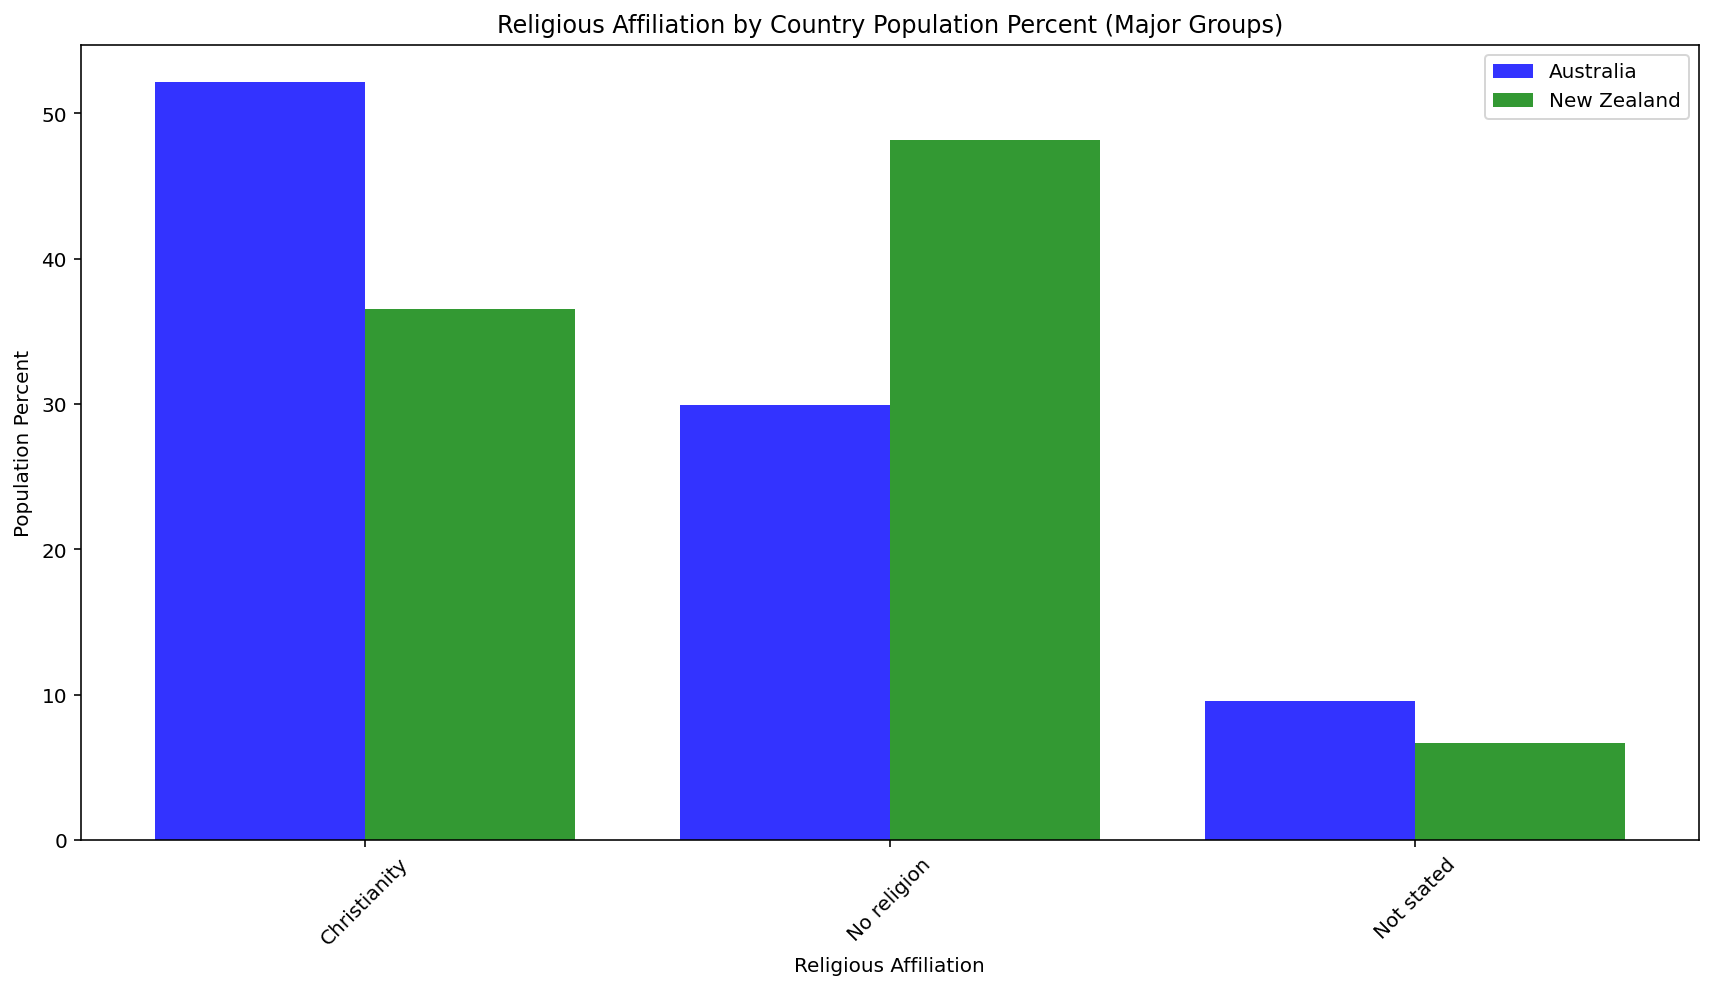

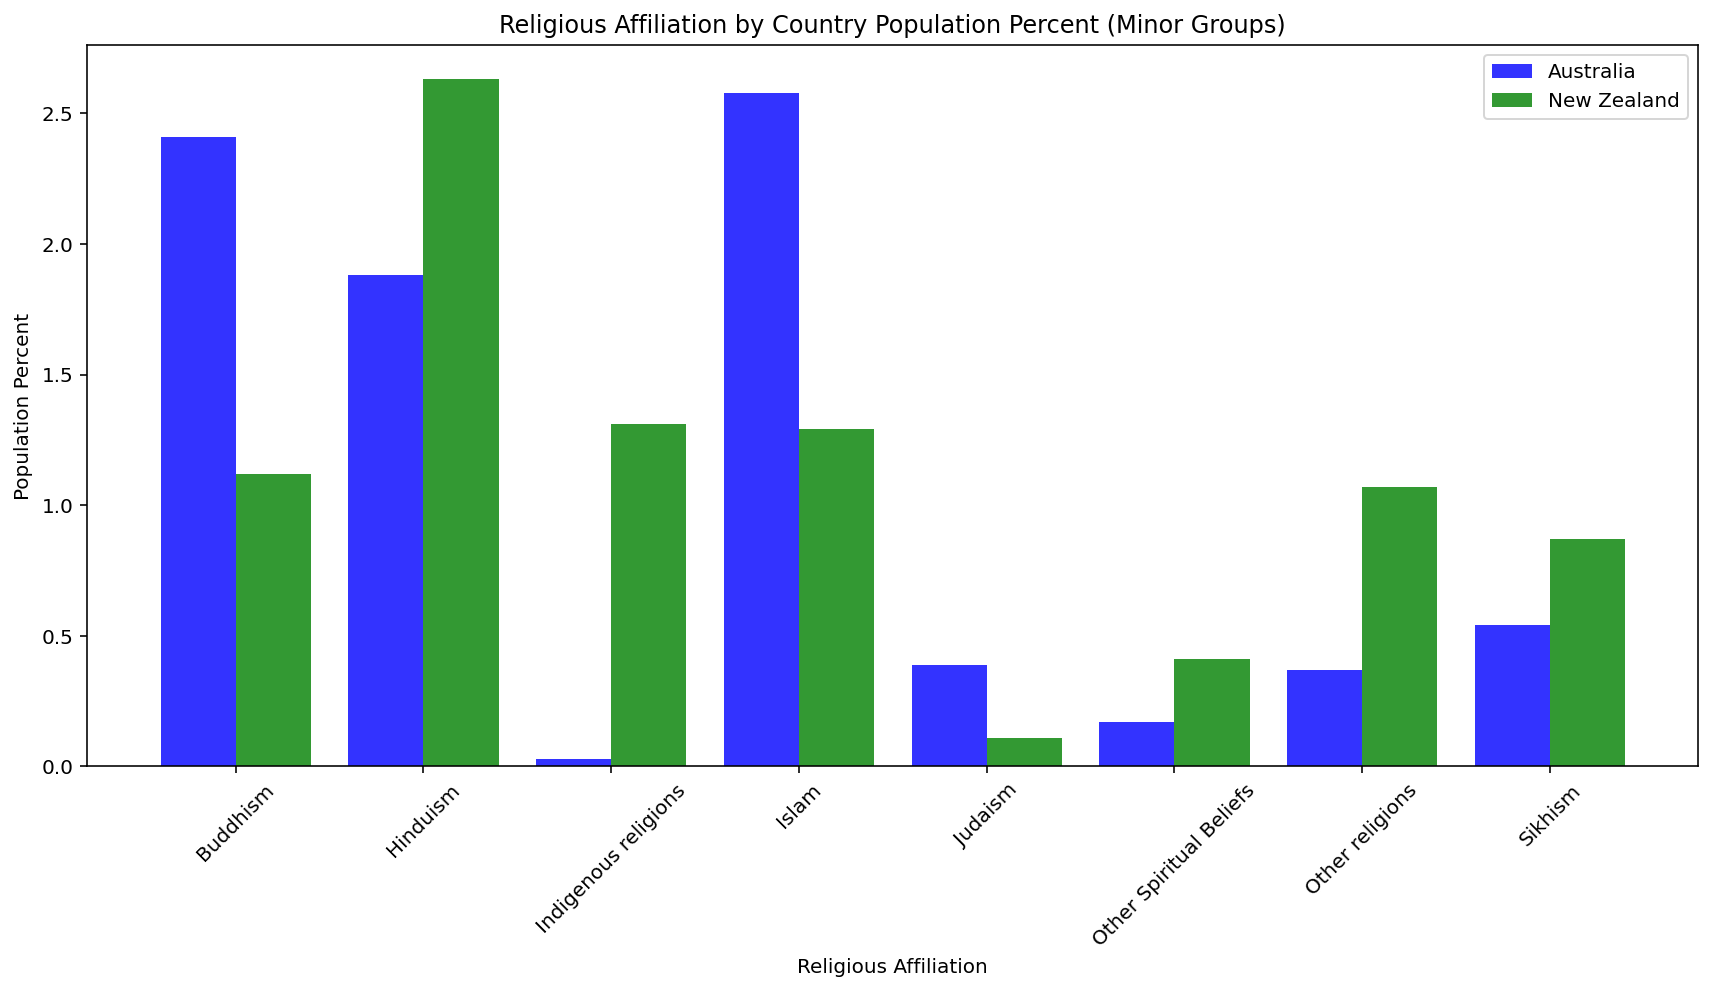

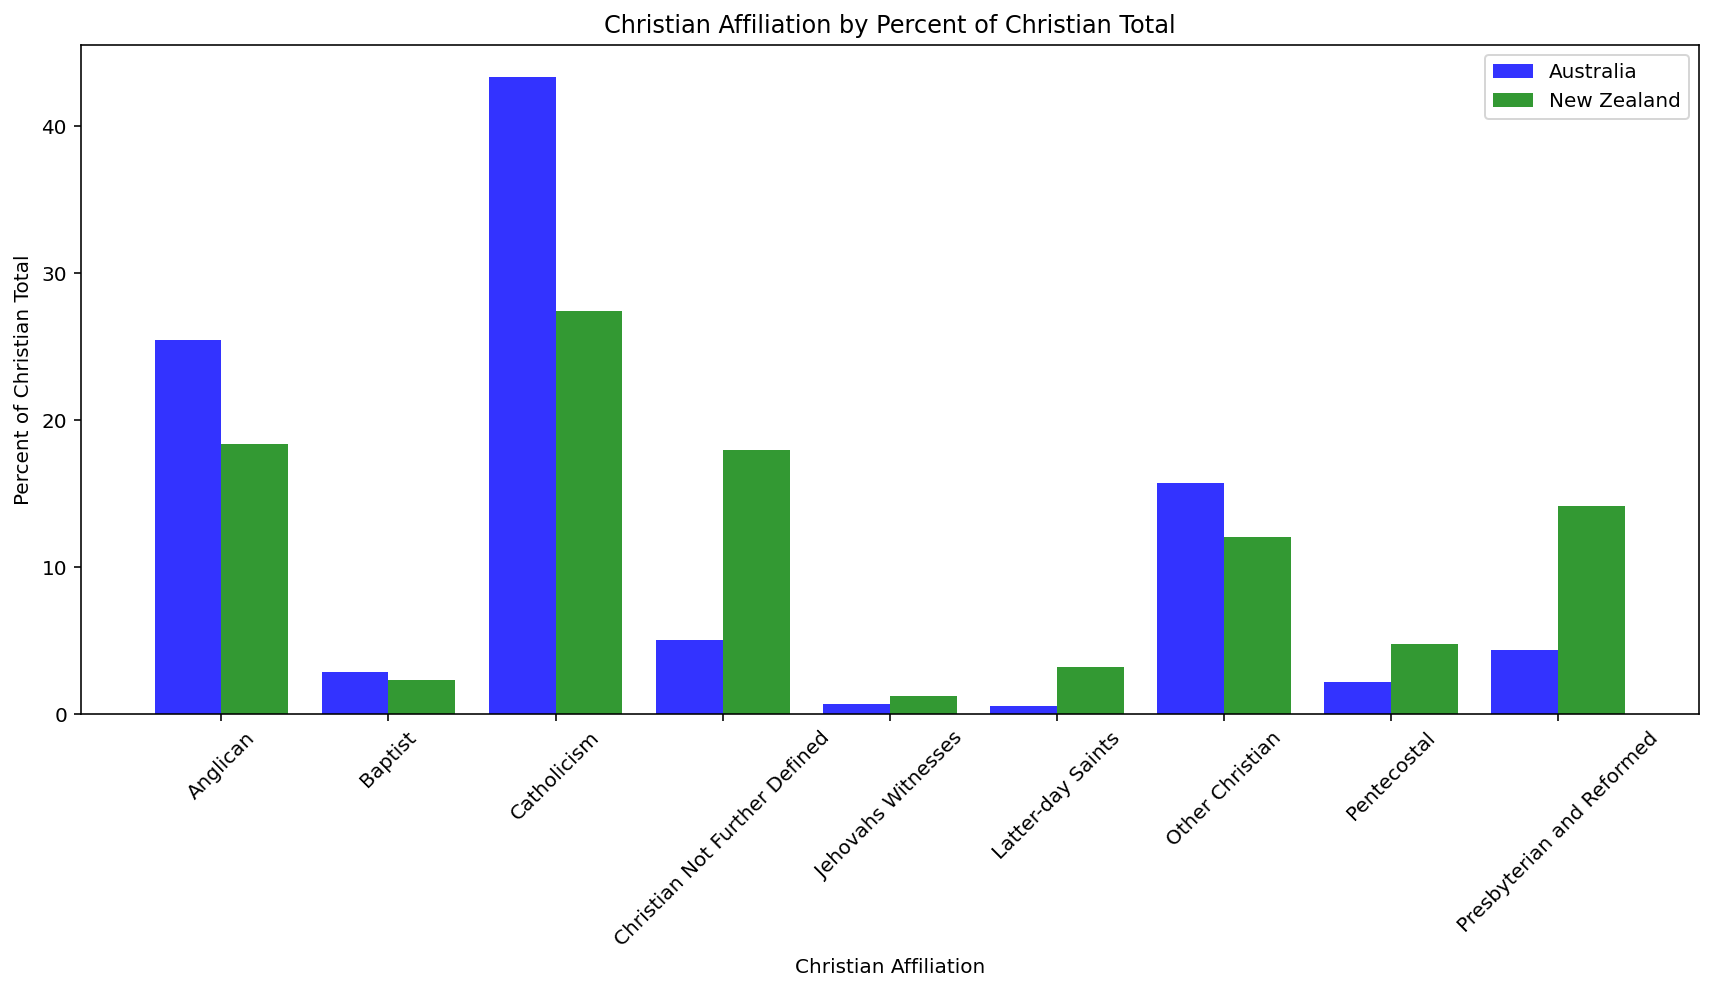

In [6]:
### CODE FROM PREVIOUS CELLS REPOSTED  BELOW ###

NZ_data = "TABLECODE8289_Data_a3090f88-82e2-4a67-a629-bac9f70eef99.csv"
AU_data = "2016Census_G14_AUS.csv"
AU_desc_data = "Metadata_2016_GCP_DataPack-Cell_Descriptors_Information-REDUCED.csv"

def read_data(data):
    """Reads a csv file and returns a list of lists"""
    with open(data, "r") as a_file:
        line_list = []
        for line in a_file:
            strip_line = line.strip().partition("\n")
            txt = strip_line[0].split(",")
            line_list.append(txt)
        return line_list

NZ_list = read_data(NZ_data)
AU_list = read_data(AU_data)
AU_desc_list = read_data(AU_desc_data)

## NZ cleaning
NZ_clean_list = []
del NZ_list[0:2]
del NZ_list[-1]
for line in NZ_list:
    if len(line) > 7:
        line[1] = line[1] + "," + line[2]
        del line[2]
    NZ_clean_list.append([line[1][1:-1], int(line[5])])

# extract NZ Christian list
NZ_Chr_clean_list = NZ_clean_list[2:14]
del NZ_clean_list[2:14]

# additional NZ & NZ_Chr fine grain cleaning
NZ_clean_list[0][0] = NZ_clean_list[0][0].replace("Christian", "Christianity")
NZ_clean_list[1][0] = NZ_clean_list[1][0].replace("Maori Religions, Beliefs and Philosophies", "Indigenous religions")
NZ_clean_list[6][0] = NZ_clean_list[6][0].replace("Spiritualism and New Age religions", "Other Spiritual Beliefs")
NZ_clean_list[12][0] = NZ_clean_list[12][0].replace("Object to answering", "Not stated")
NZ_clean_list[13][0] = NZ_clean_list[13][0].replace("Total people stated", "Total")
del NZ_clean_list[10] # subtotal removed
NZ_Chr_clean_list[0][0] = NZ_Chr_clean_list[0][0].replace("nfd", "Not Further Defined")
NZ_Chr_clean_list[6][0] = NZ_Chr_clean_list[6][0].replace("Jehovah's Witnesses", "Jehovahs Witnesses")
NZ_Chr_clean_list[10][0] = NZ_Chr_clean_list[10][0].replace("Presbyterian, Congregational and Reformed", "Presbyterian and Reformed")
NZ_Chr_clean_list[11][0] = NZ_Chr_clean_list[11][0].replace("Other Christian religions", "Other Christian")
NZ_Chr_clean_list.append([NZ_clean_list[0][0].replace("Christianity", "Total"), NZ_clean_list[0][1]])

## AU cleaning
# clean AU Religion list and add full descriptions
AU_clean_list = []
for i in range (0, len(AU_list[0])):
    if AU_list[0][i][-1] == 'P':
        AU_clean_list.append([AU_list[0][i], int(AU_list[1][i])])
AU_desc_list_clean = []
for line in AU_desc_list:
    if line[3] == 'G14' and line[1][-1] == "P":
        AU_desc_list_clean.append([line[1], line[2][0:-8].replace("_", " ")])
for line in AU_clean_list:
    for i in range(0, len(AU_desc_list_clean)):
        if line[0] == AU_desc_list_clean[i][0]:
            line[0] = AU_desc_list_clean[i][1]
            continue

# extract AU Christian list
AU_Chr_clean_list = AU_clean_list[1:21]
del AU_clean_list[1:20]

# additional AU & AU_Chr fine grain cleaning
AU_clean_list[1][0] = AU_clean_list[1][0].replace(" Total", "")
del AU_clean_list[8] # subtotal removed
del AU_clean_list[-3] # subtotal removed
for line in AU_clean_list:
    line[0] = line[0].replace("Other Religions ", "")
    line[0] = line[0].replace("Secular Beliefs and Other Spiritual Beliefs and No Religious Affiliation ", "")
AU_clean_list[7][0] = AU_clean_list[7][0].replace("Other religious groups", "Other religions")
AU_clean_list[8][0] = AU_clean_list[8][0].replace("No Religion So Described", "No religion")
AU_clean_list[5][0] = AU_clean_list[5][0].replace("Australian Aboriginal Traditional Religions", "Indigenous religions")
AU_clean_list[11][0] = AU_clean_list[11][0].replace("Religious affiliation Not Stated", "Not stated")
for line in AU_Chr_clean_list:
    line[0] = line[0].replace("Christianity ", "")
AU_Chr_clean_list[-3][0] = AU_Chr_clean_list[-3][0].replace("nfd", "Christian Not Further Defined")
AU_Chr_clean_list[4][0] = AU_Chr_clean_list[4][0].replace("Catholic", "Catholicism")
AU_Chr_clean_list[-1][0] = "Total"
AU_Chr_clean_list[8][0] = AU_Chr_clean_list[8][0].replace("Latter day Saints", "Latter-day Saints")
AU_clean_list[1][0] = "Christianity"

def move_category(focus_list, from_cat, to_cat):
    """Moves population from one category to another and removes the original entry"""
    from_index = -1
    to_index = -1
    for i in range(0, len(focus_list)):
        if focus_list[i][0] == from_cat:
            from_index = i
        if focus_list[i][0] == to_cat:
            to_index = i
    focus_list[to_index][1] += int(focus_list[from_index][1])
    del focus_list[from_index]
    return focus_list

## Religion category sorting
NZ_sorted = sorted(NZ_clean_list[0:-1])
AU_sorted = sorted(AU_clean_list[0:-1])

# Combine incomparable categories
NZ_sorted = move_category(NZ_sorted, "Jedi", "Other religions")
AU_sorted = move_category(AU_sorted, "Secular Beliefs", "No religion")

# Add column totals and row percentages
NZ_sorted.append(NZ_clean_list[-1])
AU_sorted.append(AU_clean_list[-1])
for line in NZ_sorted:
    line.append(round(line[1] / NZ_sorted[-1][1] * 100, 2))
for line in AU_sorted:
    line.append(round(line[1] / AU_sorted[-1][1] * 100, 2))

# Check validity of tables formatting
for i in range(0, len(AU_sorted)):
    if AU_sorted[i][0] != NZ_sorted[i][0]:
        raise Exception("Error at index " + str(i), AU_sorted[i][0], NZ_sorted[i][0], AU_sorted, NZ_sorted)

## Christian category sorting
NZ_Chr_sorted = sorted(NZ_Chr_clean_list[0:-1])
AU_Chr_sorted = sorted(AU_Chr_clean_list[0:-1])

# Combine incomparable categories
NZ_Chr_sorted = move_category(NZ_Chr_sorted, "Adventist", "Other Christian")
NZ_Chr_sorted = move_category(NZ_Chr_sorted, "Evangelical, Born Again and Fundamentalist", "Other Christian")
NZ_Chr_sorted = move_category(NZ_Chr_sorted, "Methodist", "Other Christian")
AU_Chr_sorted = move_category(AU_Chr_sorted, "Assyrian Apostolic", "Other Christian")
AU_Chr_sorted = move_category(AU_Chr_sorted, "Brethren", "Other Christian")
AU_Chr_sorted = move_category(AU_Chr_sorted, "Churches of Christ", "Other Christian")
AU_Chr_sorted = move_category(AU_Chr_sorted, "Eastern Orthodox", "Other Christian")
AU_Chr_sorted = move_category(AU_Chr_sorted, "Other Protestant", "Other Christian")
AU_Chr_sorted = move_category(AU_Chr_sorted, "Lutheran", "Other Christian")
AU_Chr_sorted = move_category(AU_Chr_sorted, "Oriental Orthodox", "Other Christian")
AU_Chr_sorted = move_category(AU_Chr_sorted, "Salvation Army", "Other Christian")
AU_Chr_sorted = move_category(AU_Chr_sorted, "Seventh day Adventist", "Other Christian")
AU_Chr_sorted = move_category(AU_Chr_sorted, "Uniting Church", "Other Christian")

# Add column totals and row percentages
NZ_Chr_sorted.append(NZ_Chr_clean_list[-1])
AU_Chr_sorted.append(["Total", AU_Chr_clean_list[-1][1]])
for line in NZ_Chr_sorted:
    line.append(round(line[1] / NZ_Chr_sorted[-1][1] * 100, 2))
for line in AU_Chr_sorted:
    line.append(round(line[1] / AU_Chr_sorted[-1][1] * 100, 2))

# Check validity of tables formatting
for i in range(0, len(AU_Chr_sorted)):
    if AU_Chr_sorted[i][0] != NZ_Chr_sorted[i][0]:
        raise Exception("Error at index " + str(i), AU_Chr_sorted[i], NZ_Chr_sorted[i])

### CODE FROM PREVIOUS CELLS REPOSTED ABOVE ###

import numpy as np
import matplotlib.pyplot as plt

def plot_bar_compare(labels, name_a, data_a, name_b, data_b, title, x_name, y_name):
    """Shows a bar chart comparing two input data lists"""
    n_groups = len(data_a)
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.4
    opacity = 0.8
    rects1 = plt.bar(index, data_a, bar_width, alpha=opacity, color='b', label=name_a)
    rects2 = plt.bar(index + bar_width, data_b, bar_width, alpha=opacity, color='g', label=name_b)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title(title)
    plt.xticks(index+(0.5*bar_width), labels)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Chart 1: Religions more than 5%
labels = []
data_a = []
data_b = []
for i in range(0, len(AU_sorted)-1):
    if i == 1 or i == 6 or i == 7:
        labels.append(AU_sorted[i][0])
        data_a.append(AU_sorted[i][2])
        data_b.append(NZ_sorted[i][2])
plot_bar_compare(labels, "Australia", data_a, "New Zealand", data_b, "Religious Affiliation by Country Population Percent (Major Groups)", "Religious Affiliation", "Population Percent")

print()

# Chart 2: Religions less than 5%
labels = []
data_a = []
data_b = []
for i in range(0, len(AU_sorted)-1):
    if i == 1 or i == 6 or i== 7:
        continue
    else:
        labels.append(AU_sorted[i][0])
        data_a.append(AU_sorted[i][2])
        data_b.append(NZ_sorted[i][2])
plot_bar_compare(labels, "Australia", data_a, "New Zealand", data_b, "Religious Affiliation by Country Population Percent (Minor Groups)", "Religious Affiliation", "Population Percent")

print()

# Chart 3: Christian denominations comparison
labels = []
data_a = []
data_b = []
for i in range(0, len(AU_Chr_sorted)-1):
        labels.append(AU_Chr_sorted[i][0])
        data_a.append(AU_Chr_sorted[i][2])
        data_b.append(NZ_Chr_sorted[i][2])
plot_bar_compare(labels, "Australia", data_a, "New Zealand", data_b, "Christian Affiliation by Percent of Christian Total", "Christian Affiliation", "Percent of Christian Total")


### Conclusion

In relation to the initial question of similarities and differences between religious affiliation in Australia and New Zealand, there are several significant points of interest. Firstly, Australia's largest religious affiliation is Christianity whereas New Zealand's is "No religion", with Christians in Australia being a majority whereas non religious adherents in New Zealand are just less than half of the population. The next largest religion in Australia is Islam, and for New Zealand it is Hinduism, but both of these are more than ten times less prevalent than Christianity in each country. All minor religions in both countries were observed by less than 3% of their populations. The lowest population percentage of any religion in either country was Aboriginal religions for Australia, but in contrast, Maori religions in New Zealand are practiced in numbers comparable to Islam and Buddhism. Finally, the data on Christian denominations shows Catholicism holds the highest proportion of Christians for both Australia and New Zealand, with Anglicanism having second most common prevalence for both as well. With the dynamic changes of our globalised world, upcoming census results will be watched carefully to observe how New Zealand and Australia may grow both more similar and different into the future.